In [1]:
from Load_Spectrum import *
import ROOT
from ROOT import TSpectrum, TF1
import math
import NISTdata as nd
import periodictable as pt
from scipy.stats import t, chi2
%matplotlib inline

These are not the L-lines you are looking for


In [2]:
#Load the background spetrum and the Iron spectrum into root histos
Calibration_Spectra = {}
Bkg = Load_Spectrum("XRF-11Dec2014\Bkg300s-11Dec2014.mca", 'Background')
Bkg.SetAxisRange(0, 380, "X")
Calibration_Spectra['Bkg']=Bkg
Iron = Load_Spectrum("XRF-11Dec2014\Fe300s-11Dec2014.mca", 'Iron')
Iron.SetAxisRange(0, 380, "X")
Calibration_Spectra['Iron']=Iron
Molybdenum = Load_Spectrum("XRF-11Dec2014\Mo300s-11Dec2014.mca", 'Molybdenium')
Molybdenum.SetAxisRange(0, 380, "X")
Calibration_Spectra['Molybdenum']=Molybdenum
Lead = Load_Spectrum("XRF-11Dec2014\Pb300s-11Dec2014.mca", 'Lead')
Lead.SetAxisRange(0, 380, "X")
Calibration_Spectra['Lead']=Lead
Nickel = Load_Spectrum("XRF-11Dec2014\Ni300s-11Dec2014.mca", 'Nickel')
Nickel.SetAxisRange(0, 380, "X")
Calibration_Spectra['Nickel']=Nickel
Copper = Load_Spectrum("XRF-11Dec2014\Cu300s-11Dec2014.mca", 'Copper')
Copper.SetAxisRange(0, 380, "X")
Calibration_Spectra['Copper']=Copper
Rhodium = Load_Spectrum("XRF-11Dec2014\Rh300s-11Dec2014.mca", 'Rhodium')
Rhodium.SetAxisRange(0, 380, "X")
Calibration_Spectra['Rhodium']=Rhodium
Zinc = Load_Spectrum("XRF-11Dec2014\Zn300s-11Dec2014.mca", 'Zinc')
Zinc.SetAxisRange(0, 380, "X")
Calibration_Spectra['Zinc']=Zinc
Zirconium = Load_Spectrum("XRF-11Dec2014\Zr300s-11Dec2014.mca", 'Zirconium')
Zirconium.SetAxisRange(0, 380, "X")
Calibration_Spectra['Zirconium']=Zirconium

0
0
0
0
0
0
0
299.504000
Data feed start
Data feed end
512
It is updating
0
0
0
0
0
0
0
303.236000
Data feed start
Data feed end
512
It is updating
0
0
0
0
0
0
0
287.015000
Data feed start
Data feed end
512
It is updating
0
0
0
0
0
0
0
294.780000
Data feed start
Data feed end
512
It is updating
0
0
0
0
0
0
0
294.455000
Data feed start
Data feed end
512
It is updating
0
0
0
0
0
0
0
293.552000
Data feed start
Data feed end
512
It is updating
0
0
0
0
0
0
0
293.939000
Data feed start
Data feed end
512
It is updating
0
0
0
0
0
0
0
296.449000
Data feed start
Data feed end
512
It is updating
0
0
0
0
0
0
0
291.024000
Data feed start
Data feed end
512
It is updating


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: spect (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: spect (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: spect (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: spect (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: spect (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: spect (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: spect (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: spect (Potential memory leak).


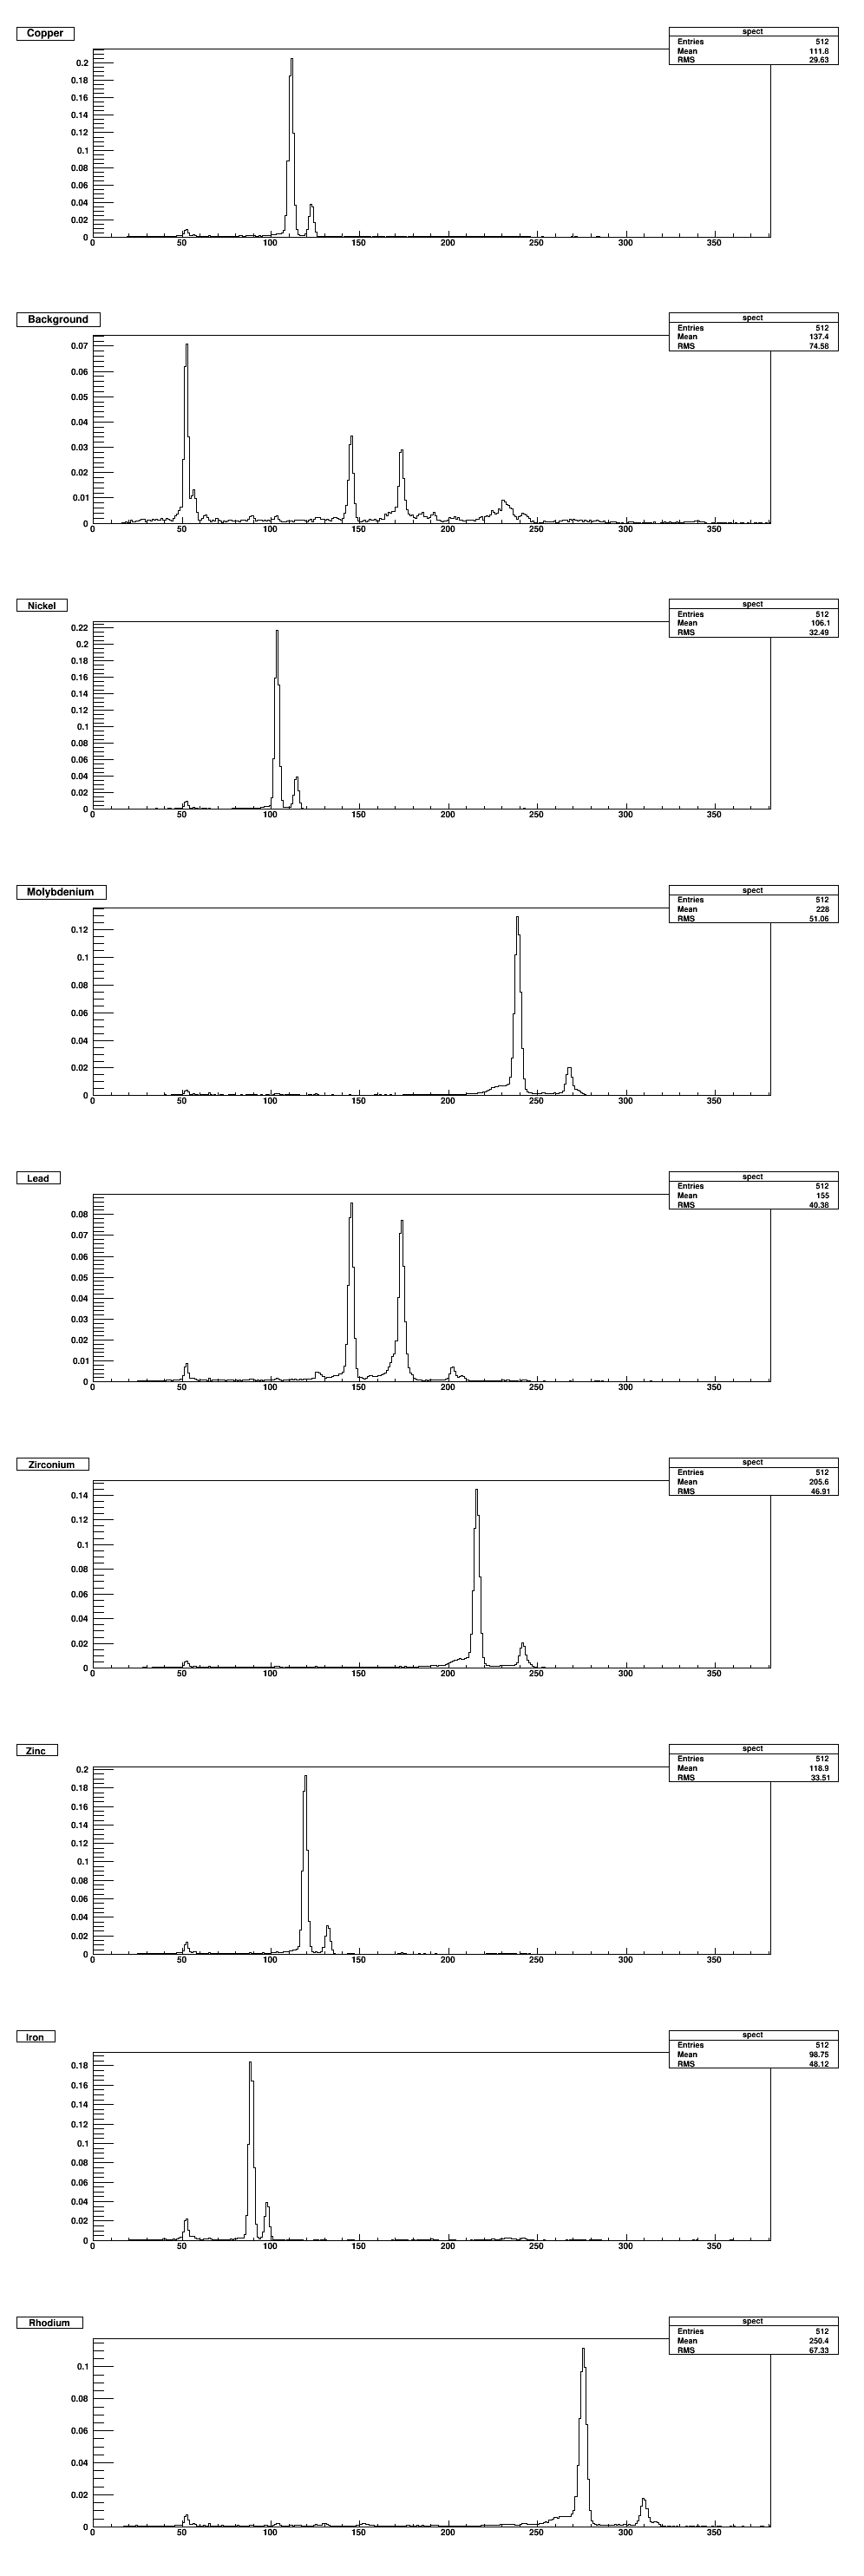

In [3]:
#Display both histos for comparison, note scales
can = rootnotes.canvas("Spectra", (1000, 333*len(Calibration_Spectra)))
can.Divide(1,len(Calibration_Spectra))
i = 1
for hist in Calibration_Spectra:
    can.cd(i)
    Calibration_Spectra[hist].Draw()
    i+=1
can

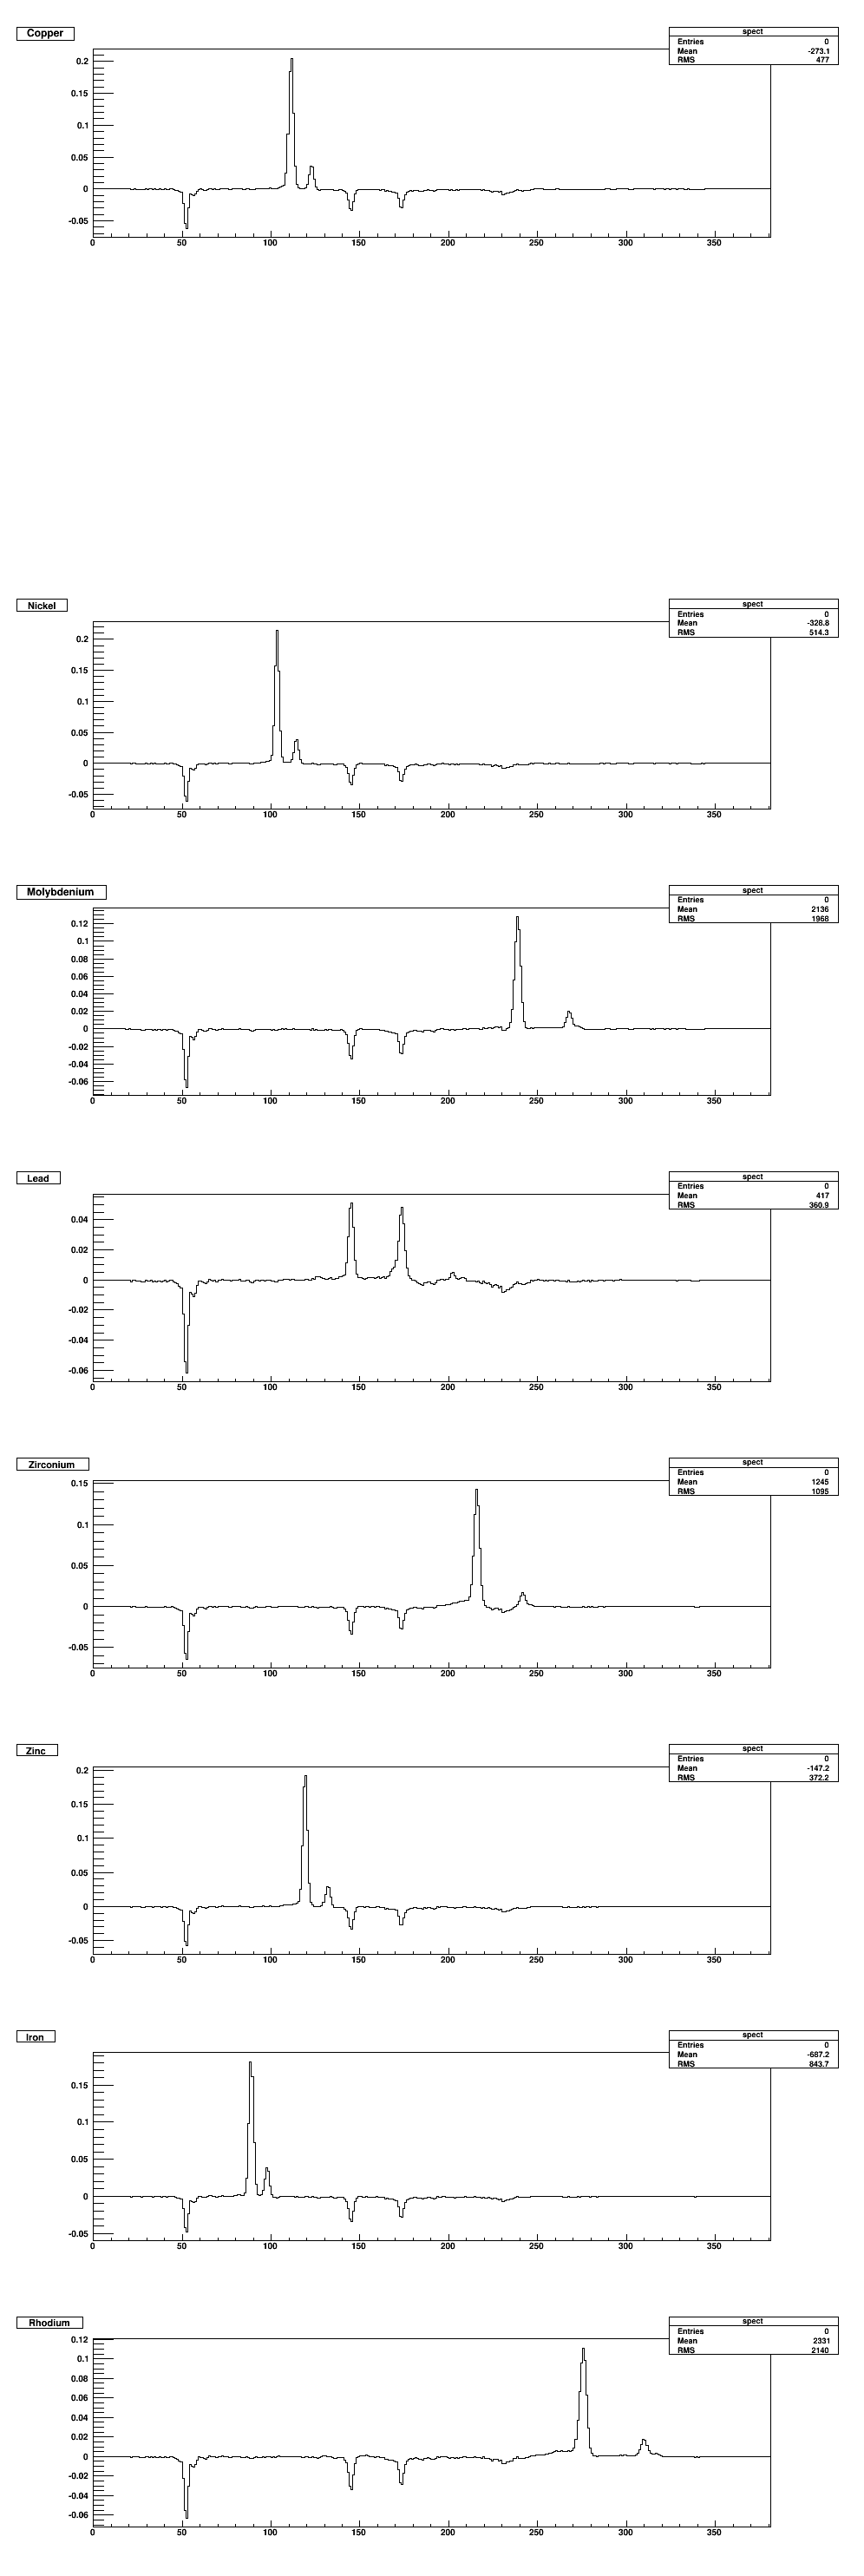

In [4]:
#Let's subtract them all by the background
can2 = rootnotes.canvas('No Bkg', (1000, 333*len(Calibration_Spectra)))
can2.Divide(1,len(Calibration_Spectra))
i = 1
for hist in Calibration_Spectra:
    if hist != 'Bkg':
        can2.cd(i)
        Calibration_Spectra[hist].Add(Calibration_Spectra['Bkg'], -1)
        Calibration_Spectra[hist].Draw()
    i+=1
can2

TSpectrum::SearchHighRes:0: RuntimeWarning: Peak buffer full
TSpectrum::SearchHighRes:0: RuntimeWarning: Peak buffer full
TSpectrum::SearchHighRes:0: RuntimeWarning: Peak buffer full


fullWidth 0
2.94226005318
fullWidth 1
2.88248040794
fullWidth 2
3.94294883476
fullWidth 3
3.50604296162
fullWidth 4
3.83628850738
fullWidth 5
3.02529195594
fullWidth 6
2.78832117647
fullWidth 7
4.58548283709
['Copper', [111.1578770258959, 122.82005588951388], [2.942260053182391, 2.9968822540985065], 'Nickel', [103.45298067789503, 114.10581704443175], [2.882480407937413, 2.9480845445243125], 'Molybdenum', [238.68044977774522, 267.93627422731], [3.942948834764446, 4.0367882284703995], 'Lead', [145.1146829673965, 173.26107039082302], [3.5060429616209574, 4.134897788568055], 'Zirconium', [215.58213289328447, 241.60391266169708], [3.8362885073843844, 3.7690407974026066], 'Zinc', [119.12314860242908, 131.83530719853837], [3.0252919559370604, 3.014813625303119], 'Iron', [88.85710040842797, 97.74640766674908], [2.788321176468845, 2.882764404010592], 'Rhodium', [275.42382266566955, 309.90542401865343], [4.585482837090695, 4.375731644017079]]


TSpectrum::SearchHighRes:0: RuntimeWarning: Peak buffer full
TSpectrum::SearchHighRes:0: RuntimeWarning: Peak buffer full
TSpectrum::SearchHighRes:0: RuntimeWarning: Peak buffer full
TSpectrum::SearchHighRes:0: RuntimeWarning: Peak buffer full
TSpectrum::SearchHighRes:0: RuntimeWarning: Peak buffer full


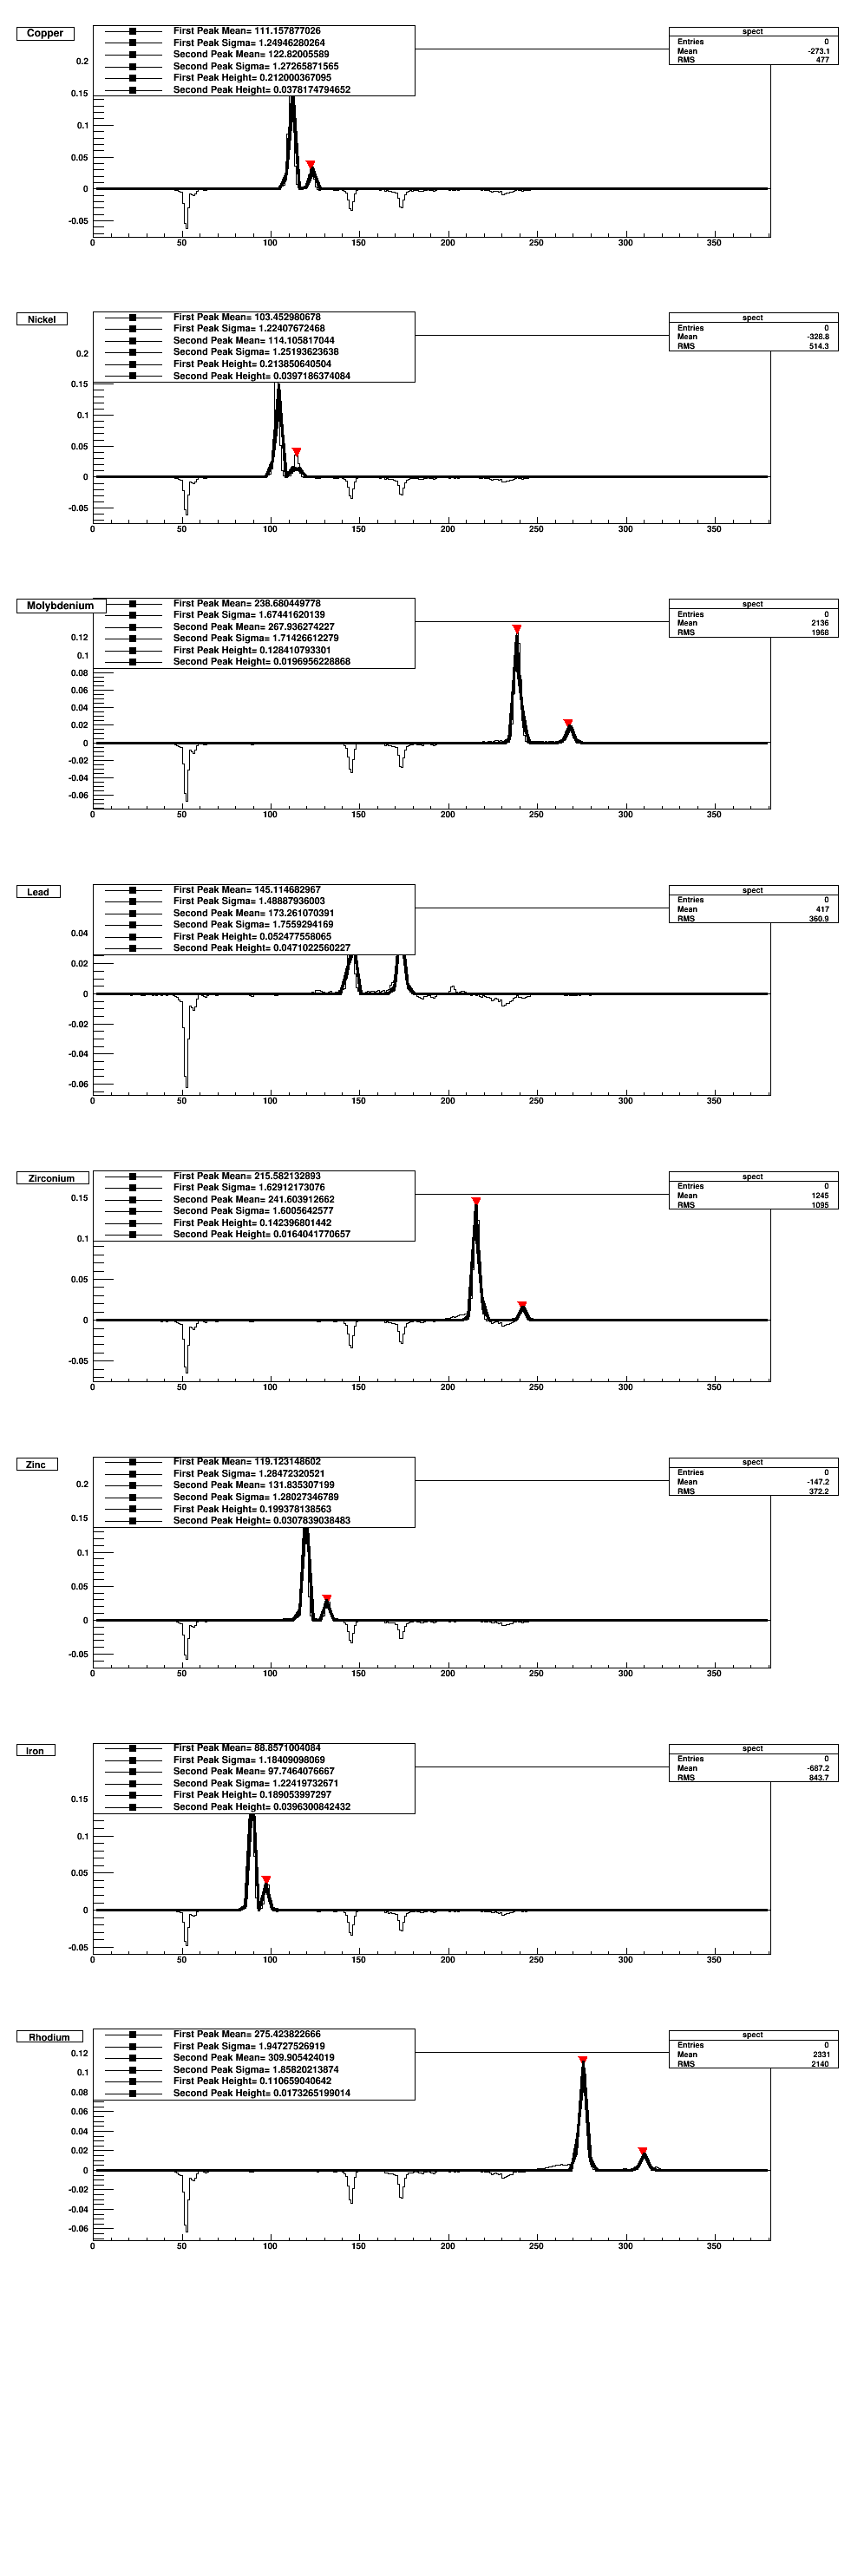

In [5]:
#Let's try fitting each one with a sum of gaussian functions setting initial params with the built in peakfinder
#that ROOT has...did I mention how cool ROOT is?
can3 = rootnotes.canvas('Fits', (1000, 333*len(Calibration_Spectra)))
can3.Clear()
can3.Divide(1,len(Calibration_Spectra))
i=0
npeaks = 0
fitfunc = []
spectra = []
peaks = []
peaksheight = []
fullwidth = []
calib_params = []
leg = []
for hist in Calibration_Spectra:
    if hist != 'Bkg':
        can3.cd(i+1)
        spectra.append(ROOT.TSpectrum(2, 10))
        npeaks = spectra[i].Search(Calibration_Spectra[hist],1,"new")
        peaks.append(spectra[i].GetPositionX())
        peaksheight.append(spectra[i].GetPositionY())
        fitfunc.append(ROOT.TF1("fitfunc", "[0]*exp(-0.5*((x-[1])/[2])^2)+[3]*exp(-0.5*((x-[4])/[5])^2)",0,380))
        fitfunc[i].SetParameter(0,peaksheight[i][0])
        fitfunc[i].SetParameter(1,peaks[i][0])
        fitfunc[i].SetParLimits(1,peaks[i][0]-1,peaks[i][0]+1)
        fitfunc[i].SetParameter(2,1.2)   
        fitfunc[i].SetParLimits(2,0,3)
        fitfunc[i].SetParameter(3,peaksheight[i][1])
        fitfunc[i].SetParameter(4,peaks[i][1])
        fitfunc[i].SetParLimits(4,peaks[i][1]-1,peaks[i][1]+1)
        fitfunc[i].SetParameter(5,1.5)
        fitfunc[i].SetParLimits(5,0,3)
        Calibration_Spectra[hist].Fit(fitfunc[i], "W")
        Calibration_Spectra[hist].Draw()
        fitfunc[i].Draw("Same")
        print "fullWidth", i
        print (2*(-2*math.log(.5))**.5*fitfunc[i].GetParameter(2))
        fullwidth.append(2*(-2*math.log(.5))**.5*fitfunc[i].GetParameter(2))
        leg.append(ROOT.TLegend(0.1,0.7,0.48,1.0))
        leg[i].AddEntry(None, "First Peak Mean= " + str(fitfunc[i].GetParameter(1)))
        leg[i].AddEntry(None, "First Peak Sigma= " + str(fitfunc[i].GetParameter(2)))
        leg[i].AddEntry(None, "Second Peak Mean= " + str(fitfunc[i].GetParameter(4)))
        leg[i].AddEntry(None, "Second Peak Sigma= " + str(fitfunc[i].GetParameter(5)))
        leg[i].AddEntry(None, "First Peak Height= " + str(fitfunc[i].GetParameter(0)))
        leg[i].AddEntry(None, "Second Peak Height= " + str(fitfunc[i].GetParameter(3)))
        leg[i].Draw("Same")
        calib_params.append(hist)
        calib_params.append([fitfunc[i].GetParameter(1), fitfunc[i].GetParameter(4)])
        calib_params.append([2*(-2*math.log(.5))**.5*fitfunc[i].GetParameter(2), 2*(-2*math.log(.5))**.5*fitfunc[i].GetParameter(5)])
        i=i+1
print calib_params
can3


In [6]:
def loadLines():
    elementsK = {}
    for i in xrange(11,100):
        try:
            elementsK[str(i)] = (nd.Ka["'" + str(pt.elements[i]) + "'"],nd.Kb1["'" + str(pt.elements[i]) + "'"])
            elementsK[str(pt.elements[i])] = (nd.Ka["'" + str(pt.elements[i]) + "'"],nd.Kb1["'" + str(pt.elements[i]) + "'"])
            elementsK[str(pt.elements[i].name)] = (nd.Ka["'" + str(pt.elements[i]) + "'"],nd.Kb1["'" + str(pt.elements[i]) + "'"])
        except KeyError:
            print str(pt.elements[i].name) + " has no K-line data."
    elementsL = {}
    for i in xrange(30,100):
        try:
            elementsL[str(i)] = (nd.La["'" + str(pt.elements[i]) + "'"],nd.Lb1["'" + str(pt.elements[i]) + "'"])
            elementsL[str(pt.elements[i])] = (nd.La["'" + str(pt.elements[i]) + "'"],nd.Lb1["'" + str(pt.elements[i]) + "'"])
            elementsL[str(pt.elements[i].name)] = (nd.La["'" + str(pt.elements[i]) + "'"],nd.Lb1["'" + str(pt.elements[i]) + "'"])
        except KeyError:
            print str(pt.elements[i].name) + " has no L-line data."
    return elementsK, elementsL
KLines, LLines=loadLines()

phosphorus has no K-line data.
sulfur has no K-line data.
potassium has no K-line data.
vanadium has no K-line data.
yttrium has no K-line data.
tellurium has no K-line data.
iodine has no K-line data.
xenon has no K-line data.
cesium has no K-line data.
barium has no K-line data.
lanthanum has no K-line data.
cerium has no K-line data.
praseodymium has no K-line data.
neodymium has no K-line data.
promethium has no K-line data.
samarium has no K-line data.
europium has no K-line data.
gadolinium has no K-line data.
terbium has no K-line data.
dysprosium has no K-line data.
holmium has no K-line data.
erbium has no K-line data.
thulium has no K-line data.
ytterbium has no K-line data.
lutetium has no K-line data.
hafnium has no K-line data.
tantalum has no K-line data.
tungsten has no K-line data.
rhenium has no K-line data.
osmium has no K-line data.
iridium has no K-line data.
platinum has no K-line data.
gold has no K-line data.
mercury has no K-line data.
thallium has no K-line dat

In [7]:
#Now let's make an energy calibration curve
import numpy as np
channelenergy = np.empty((len(calib_params[0:len(calib_params):3]), 3))
for i in range(0,len(calib_params[0:len(calib_params):3])/2):
    try:
        channelenergy[2*i] = [calib_params[3*i+1][0], KLines[calib_params[3*i].lower()][0], calib_params[3*i+2][0]]
        channelenergy[2*i+1] = [calib_params[3*i+1][1], KLines[calib_params[3*i].lower()][1], calib_params[3*i+2][1]]
    except KeyError:
        print "No Line"
        channelenergy[2*i] = [calib_params[3*i+1][0], LLines[calib_params[3*i].lower()][0], calib_params[3*i+2][0]]
        channelenergy[2*i+1] = [calib_params[3*i+1][1], LLines[calib_params[3*i].lower()][1], calib_params[3*i+2][1]]
        print calib_params[3*i], channelenergy[2*i]
print channelenergy

"""from scipy.optimize import curve_fit
func = lambda x,m,b: m*x + b
p0 = [0.1, -0.05]
popt,pcov = curve_fit(func,channels,energy,p0,sigma=1/FWHM**2)"""

No Line
Lead [ 145.11468297   10.500595      3.50604296]
[[ 111.15787703    8.03783215    2.94226005]
 [ 122.82005589    8.905413      2.99688225]
 [ 103.45298068    7.4696432     2.88248041]
 [ 114.10581704    8.264775      2.94808454]
 [ 238.68044978   17.426831      3.94294883]
 [ 267.93627423   19.60834       4.03678823]
 [ 145.11468297   10.500595      3.50604296]
 [ 173.26107039   12.6138        4.13489779]]


'from scipy.optimize import curve_fit\nfunc = lambda x,m,b: m*x + b\np0 = [0.1, -0.05]\npopt,pcov = curve_fit(func,channels,energy,p0,sigma=1/FWHM**2)'

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
func = lambda x,m,b: m*x + b
p0 = [0.1, -0.05]
popt,pcov = curve_fit(func,channelenergy[:,0],channelenergy[:,1],p0,sigma=1/channelenergy[:,2]**2)
fitresult = func(channelenergy[:,0],popt[0],popt[1])

[]

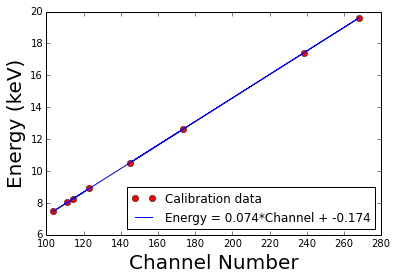

In [9]:
plt.plot(channelenergy[:,0],channelenergy[:,1],"ro",label="Calibration data")
curve="Energy = %.3f*Channel + %.3f"%(popt[0],popt[1])
plt.plot(channelenergy[:,0],fitresult,'b-',label=curve)
plt.xlabel("Channel Number",fontsize=20)
plt.ylabel("Energy (keV)",fontsize=20)
plt.legend(loc="best")
plt.plot()

[ 0.02230421 -0.00072307 -0.71449838]
-0.363338244273
-0.188934826185


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:6: RuntimeWarning: divide by zero encountered in power


[]

C:\Python27\lib\site-packages\matplotlib\transforms.py:644: RuntimeWarning: invalid value encountered in sign
  dx0 = np.sign(vertices[:, 0] - x0)
C:\Python27\lib\site-packages\matplotlib\transforms.py:646: RuntimeWarning: invalid value encountered in sign
  dx1 = np.sign(vertices[:, 0] - x1)


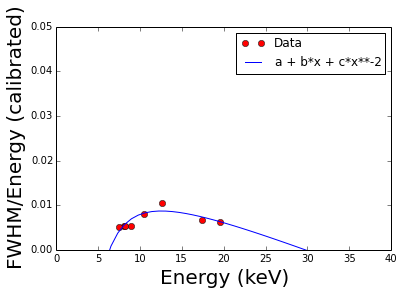

In [10]:
#following Klay's lead
calFWHM = np.empty((len(calib_params[0:len(calib_params):3])))
calFWHM = channelenergy[:,2]*popt[0]+popt[1]
calenergy = channelenergy[:,0]*popt[0]+popt[1] 
                   
func2 = lambda x,a,b,c: a + b*x + c*x**-2
popt2,pcov2 = curve_fit(func2,calenergy,calFWHM/calenergy,[0.02,1.e-3,0.5])
print popt2
x = np.linspace(0.,40.)
resolution = func2(x,popt2[0],popt2[1],popt2[2])
print resolution[3.685]*3.685
print resolution[4.014]*4.014

plt.plot(calenergy,calFWHM/calenergy,"ro",label="Data")
plt.plot(x,resolution,'b-',label="a + b*x + c*x**-2")
plt.xlabel("Energy (keV)",fontsize=20)
plt.ylabel("FWHM/Energy (calibrated)",fontsize=20)
plt.legend(loc="best")
plt.ylim(0.,0.05)
plt.plot()


Let us begin with the real analysis of a sample!

In [25]:
Sample, n = Load_Spectrum("XRF-11Dec2014\PenaSide2-300s-11Dec2014.mca", 'Sample', normret=True)
Sample.SetAxisRange(0, 380, "X")
Sample.Add(Calibration_Spectra['Bkg'], -1)
Analysis = ROOT.TH1F("analysis", 'Sample', int(512), 0, float(35))

0
0
0
0
0
0
0
297.604000
Data feed start
Data feed end
512
It is updating


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: spect (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: analysis (Potential memory leak).


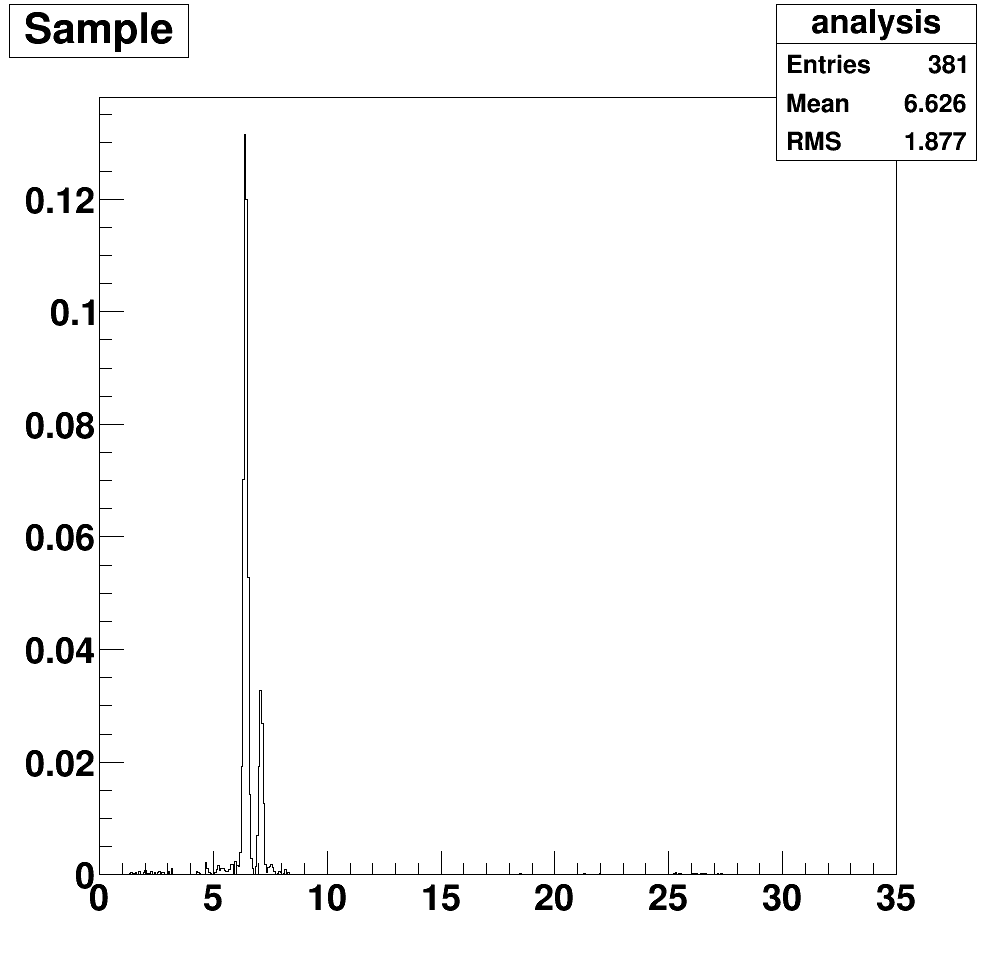

In [26]:
can5 = rootnotes.canvas('Sample', (1000,1000))
can5.Clear()
can5.cd()
for i in range(381):
    if Sample.GetBinContent(i) < 0:
        Analysis.Fill(i*popt[0]+popt[1],0)
    else:
        Analysis.Fill(i*popt[0]+popt[1],Sample.GetBinContent(i))
Analysis.Draw()
can5

[0]*exp(-0.5*((x-[1])/[2])^2) + [3]*exp(-0.5*((x-[4])/[5])^2)
<Float_t buffer, size 2147483647>


TSpectrum::SearchHighRes:0: RuntimeWarning: Peak buffer full


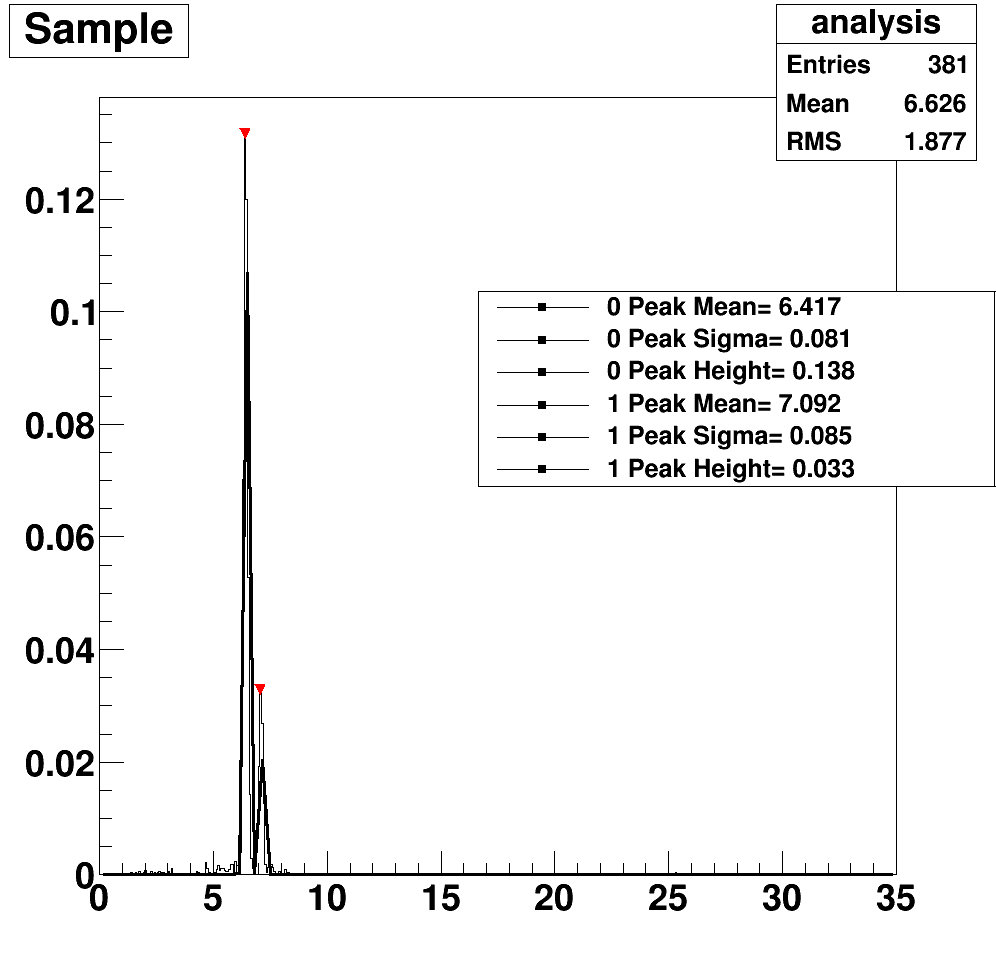

In [27]:
can6 = rootnotes.canvas('Sample', (1000,1000))
can6.Clear()
can6.cd()
anapeaks = []
fitdef = ""
peakfinder =ROOT.TSpectrum(2, 10)
npeaks = peakfinder.Search(Analysis,1,"new",.05)
anapeaks = peakfinder.GetPositionX()
anapeaksheight = peakfinder.GetPositionY()
for i in range(npeaks):
    fitdef += "[%d]*exp(-0.5*((x-[%d])/[%d])^2) + " % (3*i, 3*i+1, 3*i+2)
fitdef = fitdef[:-3]
print fitdef
fitsfunc=ROOT.TF1("fitsfunc", fitdef, 0, 35)
for i in range(npeaks):
    fitsfunc.SetParameter(3*i,anapeaksheight[i])
    fitsfunc.SetParLimits(3*i,anapeaksheight[i]-.1,anapeaksheight[i]+.1)
    fitsfunc.SetParameter(3*i+1,anapeaks[i])
    fitsfunc.SetParLimits(3*i+1,anapeaks[i]-1,anapeaks[i]+1)
    fitsfunc.SetParameter(3*i+2,func2(anapeaks[i],popt2[0],popt2[1],popt2[2])*anapeaks[i])   
    fitsfunc.SetParLimits(3*i+2,func2(anapeaks[i],popt2[0],popt2[1],popt2[2])*anapeaks[i]-1,func2(anapeaks[i],popt2[0],popt2[1],popt2[2])*anapeaks[i]+1)
Analysis.Fit(fitsfunc, "W")
Analysis.Draw()
fitsfunc.Draw("Same")
analeg = ROOT.TLegend(1,0.7,0.48,.50)
for i in range(npeaks):
    analeg.AddEntry(None, "%d Peak Mean= %.3f" % (i, fitsfunc.GetParameter(3*i+1)))
    analeg.AddEntry(None, "%d Peak Sigma= %.3f" % (i, fitsfunc.GetParameter(3*i+2)))
    analeg.AddEntry(None, "%d Peak Height= %.3f" % (i, fitsfunc.GetParameter(3*i)))
analeg.Draw("Same")
print anapeaks
can6

Make a function that takes each peak and matches it to the closest k line then if it hasnt matched to within the tolerance of say 1 or two sigma, look for l lines. Talk to klay about getting relative abundances.

In [28]:
bestline = [100000000000]
peaklines = []
i=0
for peak in anapeaks:
    if i >= npeaks:
        break
    print peak
    for k in KLines:
        alpha = abs(peak-KLines[k][0])
        beta = abs(peak-KLines[k][1])
        if i>0:
            if peaklines[i-1][2]==alpha:
                if abs(peak-KLines[peaklines[i-1][1]][1])<.1:
                    bestline = [abs(peak-KLines[peaklines[i-1][1]][1]), peaklines[i-1][1], "beta"]
                    break
            elif peaklines[i-1][2]==beta:
                if abs(peak-KLines[peaklines[i-1][1]][0])<.1:
                    bestline = [abs(peak-KLines[peaklines[i-1][1]][0]), peaklines[i-1][1], "alpha"]
                    break
        if alpha > beta and bestline[0] > beta:
            bestline = [beta, k, "beta"]
            print "beta"
        elif beta > alpha and bestline[0] > alpha:
            bestline = [alpha,k, "alpha"]
            print "alpha"
    bestline.append(str(peak)+' keV')
    peaklines.append(bestline)
    bestline = [100000000000]
    i+=1
if KLines[peaklines[0][1]]!=KLines[peaklines[1][1]]:
    print "No matching K-lines! Trying L-lines..."
    bestline = [100000000000]
    peaklines = []
    i=0
    for peak in anapeaks:
        if i >= npeaks:
            break
        print peak
        for k in LLines:
            alpha = abs(peak-LLines[k][0])
            beta = abs(peak-LLines[k][1])
            if i>0:
                if peaklines[i-1][2]=='alpha':
                    if abs(peak-LLines[peaklines[i-1][1]][1])<1:
                        bestline = [abs(peak-LLines[peaklines[i-1][1]][1]), peaklines[i-1][1], "beta"]
                        print "breaking"
                        break
                elif peaklines[i-1][2]=='beta':
                    if abs(peak-LLines[peaklines[i-1][1]][0])<1:
                        bestline = [abs(peak-LLines[peaklines[i-1][1]][0]), peaklines[i-1][1], "alpha"]
                        print"breaking"
                        break
            if alpha > beta and bestline[0] > beta:
                bestline = [beta, k, "beta"]
                print "beta"
            elif beta > alpha and bestline[0] > alpha:
                bestline = [alpha,k, "alpha"]
                print "alpha"
        bestline.append(str(peak)+' keV')
        peaklines.append(bestline)
        bestline = [100000000000]
        i+=1
print peaklines

6.3916015625
alpha
alpha
alpha
beta
beta
alpha
7.0751953125
alpha
alpha
alpha
beta
[[0.0059147374999994895, '26', 'alpha', '6.3916015625 keV'], [0.01702031249999969, '26', 'beta', '7.0751953125 keV']]


Now for the relative abundances

In [29]:
relabun = ((fitsfunc.GetParameter(0)*math.sqrt(math.pi*2*(fitsfunc.GetParameter(2))**2)+fitsfunc.GetParameter(3)\
           *math.sqrt(math.pi*2*(fitsfunc.GetParameter(5))**2))/Analysis.Integral("width"))
print relabun
print n

0.908856621697
512.0


In [35]:
rel1 = 0.902469091134
n1 = 512
rel2 = 0.887974227335
n2=n1
rel3 = 0.908856621697
n3=n2
relave = (rel1+rel2+rel3)/3
print relave

0.899766646722


Now we are going to compute the upper and lower bounds on the population mean and std. deviation using a 95% confidence interval to find the upper and lower bounds on the relative abundance.

In [34]:
relabmin1, relabmax1 = t.interval(.99, n, loc=relave, scale=((relave*(1-relave))/(n1+n2+n3))**.5)
print(relabmin1, relabmax1)

(0.87995528842052573, 0.91957800502347431)


In [36]:
print(relabmax1-relave, relave-relabmin1)

(0.019811358301474291, 0.019811358301474291)
